# KNN Predict whether a person would have Diabetes or not

In [1]:
## importing libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [2]:
dataset = pd.read_csv(r'C:\Users\Dell\Desktop\common dataset\diabetes.csv')
len(dataset)

768

In [3]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### What is correlation?

Correlation is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate). It’s a common tool for describing simple relationships without making a statement about cause and effect.

In [4]:
correlate =dataset.corr()
correlate

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

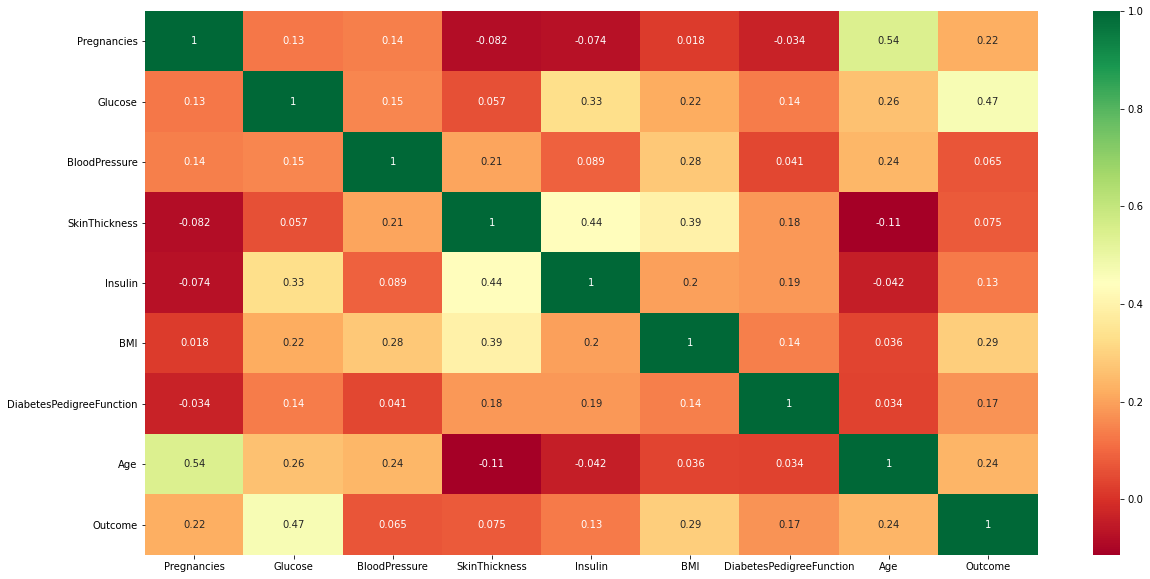

In [10]:
## importing libaries for plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Get Correlations of each features in the dataset
top_corr_features = correlate.index
plt.figure(figsize=(20,10))

# Plotting heat map
sns.heatmap(dataset[top_corr_features].corr(), annot = True, cmap = 'RdYlGn')

## Model 

As certain columns like Glucose, BlooodPressure, SkinThickness, Insulin, BMI cannot have zero value because that is not scientifically possible for a living human. Hence we will replace these values with NaN 

In [9]:
# replacing zeroes with NaN
zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in zero_not_accepted:
    dataset[column] = dataset[column].replace(0,np.NaN)
    mean = int(dataset[column].mean(skipna=True))
    dataset[column] = dataset[column].replace(np.NaN, mean)

In [10]:
## splitting the dataset into test and train dataset.
x = dataset.iloc[:,0:8]
y = dataset.iloc[:,8]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)

In [11]:
# Feature Scaling
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

### What is KNN? 

KNN is a model that classifies data points based on the points that are most similar to it. It uses test data to make an “educated guess” on what an unclassified point should be classified as.

In [12]:
# Define the model: Init K-NN
classifier = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')
classifier.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [13]:
# Predict
predict = classifier.predict(x_test)
predict

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

# Testing

In [14]:
# Evaluate Model using confusion matrix
pd.DataFrame(confusion_matrix(y_test, predict), columns=['Predicted NO', 'Predicted Yes'], index=['Actual NO', 'Actual Yes'])


,Predicted NO,Predicted Yes
Actual NO,94,13
Actual Yes,15,32


### What is the F-score?
The F-score, also called the F1-score, is a measure of a model’s accuracy on a dataset. It is used to evaluate binary classification systems, which classify examples into ‘positive’ or ‘negative’.

The F-score is a way of combining the precision and recall of the model, and it is defined as the harmonic mean of the model’s precision and recall.

In [15]:
# F1 Score
(f1_score(y_test, predict))

0.6956521739130436

### What is Classification Accuracy?

Classification Accuracy is what we usually mean, when we use the term accuracy. It is the ratio of number of correct predictions to the total number of input samples.


In [16]:
# Accuracy Score
accuracy_score(y_test, predict)*100

81.81818181818183